In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
df.shape

(205, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [9]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [10]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [11]:
df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [12]:
df['cylindernumber']=df['cylindernumber'].map({'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':12})

In [13]:
df['cylindernumber'].dtype

dtype('int64')

In [14]:
df['enginetype']=df['enginetype'].map({'ohc':1,'ohcf':2,'ohcv':3,'dohc':4,'l':5,'rotar':6,'dohcv':7})

<AxesSubplot: xlabel='cylindernumber', ylabel='price'>

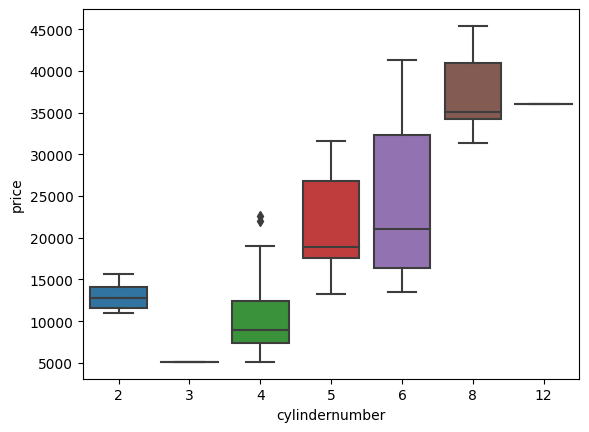

In [15]:
sns.boxplot(data=df,x='cylindernumber',y='price')

<AxesSubplot: xlabel='enginelocation', ylabel='price'>

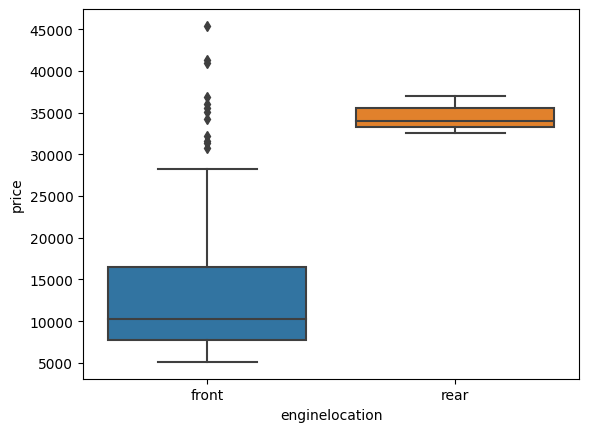

In [16]:
sns.boxplot(data=df,x='enginelocation',y='price')

<AxesSubplot: xlabel='carbody', ylabel='price'>

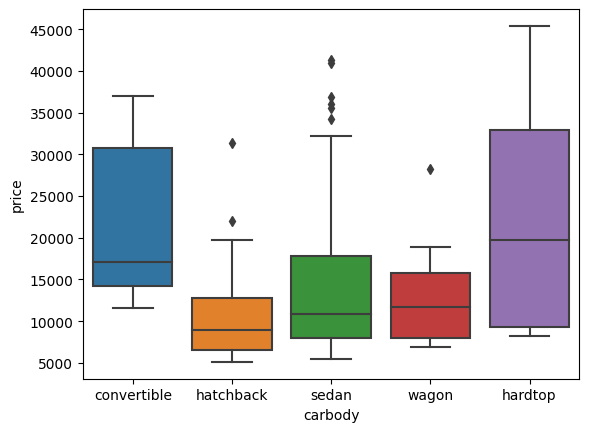

In [17]:
sns.boxplot(data=df,x='carbody',y='price')

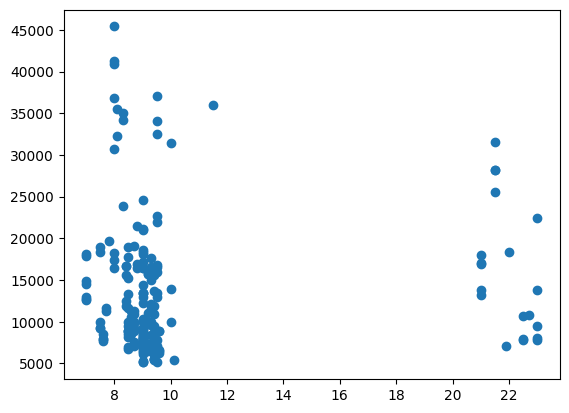

In [18]:
plt.scatter(x='compressionratio',y='price',data=df)

In [19]:
df.head(1)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


<AxesSubplot: xlabel='symboling', ylabel='price'>

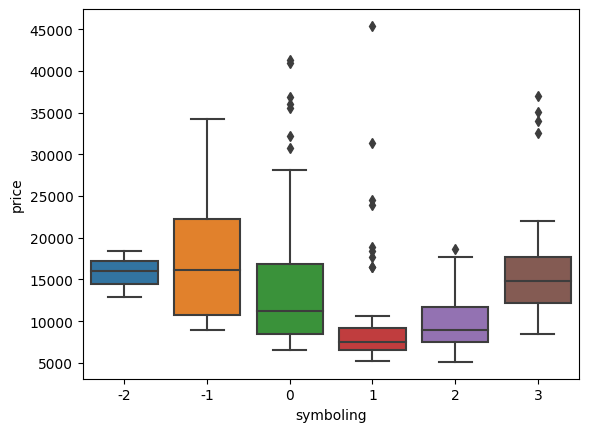

In [20]:
sns.boxplot(data=df,x='symboling',y='price')

<AxesSubplot: xlabel='price', ylabel='curbweight'>

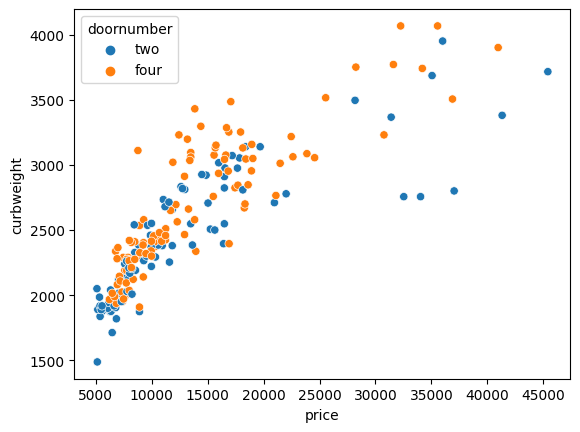

In [21]:
sns.scatterplot(x='price',y='curbweight',hue='doornumber',data=df)

<AxesSubplot: >

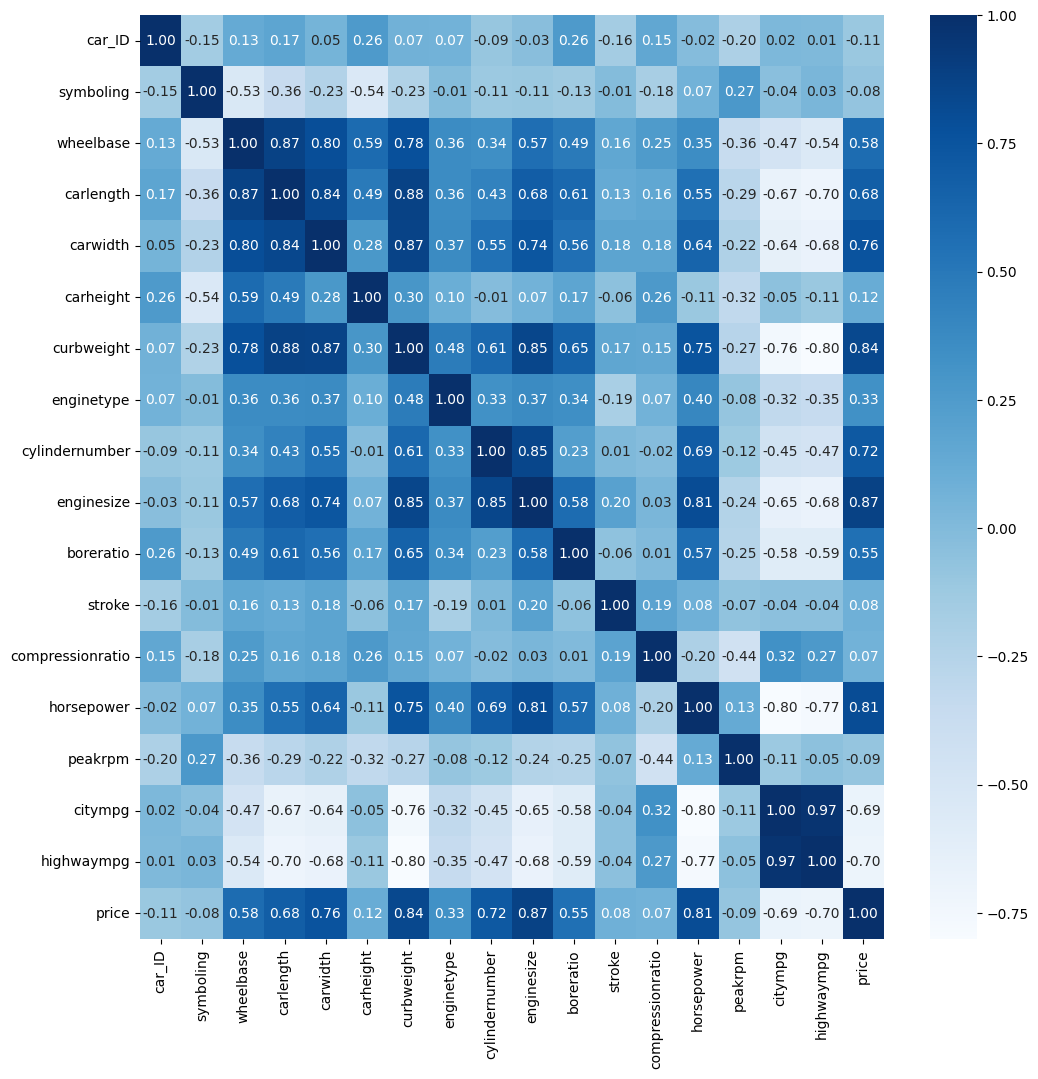

In [22]:
plt.rcParams['figure.figsize']=(12,12)
corr=df.corr()
sns.heatmap(corr,fmt='.2f',annot=True,cmap=plt.cm.Blues)

In [23]:
df_corr=df.corr().abs()
df_corr



,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,0.065176,0.094493,0.033930,0.260064,0.160824,0.150276,0.015006,0.203789,0.015940,0.011255,0.109093
symboling,0.151621,1.000000,0.531954,0.357612,0.232919,0.541038,0.227691,0.011804,0.113129,0.105790,0.130051,0.008735,0.178515,0.070873,0.273606,0.035823,0.034606,0.079978
wheelbase,0.129729,0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.361491,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,0.360469,0.470414,0.544082,0.577816
carlength,0.170636,0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.364695,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,0.287242,0.670909,0.704662,0.682920
carwidth,0.052387,0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.371306,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,0.220012,0.642704,0.677218,0.759325
carheight,0.255960,0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.103123,0.013995,0.067149,0.171071,0.055307,0.261214,0.108802,0.320411,0.048640,0.107358,0.119336
curbweight,0.071962,0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.477555,0.609727,0.850594,0.648480,0.168790,0.151362,0.750739,0.266243,0.757414,0.797465,0.835305
enginetype,0.065176,0.011804,0.361491,0.364695,0.371306,0.103123,0.477555,1.000000,0.328751,0.368293,0.343801,0.189167,0.070338,0.398663,0.084514,0.320594,0.350527,0.325428
cylindernumber,0.094493,0.113129,0.339507,0.430672,0.545007,0.013995,0.609727,0.328751,1.000000,0.846031,0.231399,0.008210,0.020002,0.692016,0.124172,0.445837,0.466666,0.718305
enginesize,0.033930,0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,0.368293,0.846031,1.000000,0.583774,0.203129,0.028971,0.809769,0.244660,0.653658,0.677470,0.874145


In [24]:
upper=df_corr.where(np.triu(np.ones(df_corr.shape),k=1).astype(np.bool_))
upper


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,NaN,0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,0.065176,0.094493,0.033930,0.260064,0.160824,0.150276,0.015006,0.203789,0.015940,0.011255,0.109093
symboling,NaN,NaN,0.531954,0.357612,0.232919,0.541038,0.227691,0.011804,0.113129,0.105790,0.130051,0.008735,0.178515,0.070873,0.273606,0.035823,0.034606,0.079978
wheelbase,NaN,NaN,NaN,0.874587,0.795144,0.589435,0.776386,0.361491,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,0.360469,0.470414,0.544082,0.577816
carlength,NaN,NaN,NaN,NaN,0.841118,0.491029,0.877728,0.364695,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,0.287242,0.670909,0.704662,0.682920
carwidth,NaN,NaN,NaN,NaN,NaN,0.279210,0.867032,0.371306,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,0.220012,0.642704,0.677218,0.759325
carheight,NaN,NaN,NaN,NaN,NaN,NaN,0.295572,0.103123,0.013995,0.067149,0.171071,0.055307,0.261214,0.108802,0.320411,0.048640,0.107358,0.119336
curbweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.477555,0.609727,0.850594,0.648480,0.168790,0.151362,0.750739,0.266243,0.757414,0.797465,0.835305
enginetype,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.328751,0.368293,0.343801,0.189167,0.070338,0.398663,0.084514,0.320594,0.350527,0.325428
cylindernumber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.846031,0.231399,0.008210,0.020002,0.692016,0.124172,0.445837,0.466666,0.718305
enginesize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.583774,0.203129,0.028971,0.809769,0.244660,0.653658,0.677470,0.874145


In [25]:
to_drop=[column for column in upper.columns if any (upper[column]>0.95)]
print('----------------------------')
print(to_drop)



----------------------------
['highwaympg']


In [26]:
df1=df.drop(to_drop,axis=1)
df1.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price'],
      dtype='object')

In [27]:
df1.drop('car_ID',axis=1,inplace=True)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        201 non-null    float64
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [29]:
df1.nunique()

symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            6
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
price               189
dtype: int64

In [30]:
dummies=pd.get_dummies(df1[['fueltype','aspiration','doornumber','carbody','drivewheel',
                            'enginelocation','fuelsystem']])

In [31]:
dummies.head(2)

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,enginelocation_front,enginelocation_rear,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,1,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [32]:
df1=pd.concat([df1,dummies],axis=1)

In [33]:
df1.drop(['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','fuelsystem'],
         axis=1,inplace=True)

In [34]:
#checking for null values in enginetype feature
df1[df1['enginetype'].isnull()]

,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,...,enginelocation_front,enginelocation_rear,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
55,3,mazda 626,95.3,169.0,65.7,49.6,2380,NaN,2,70,...,1,0,0,0,1,0,0,0,0,0
56,3,mazda glc,95.3,169.0,65.7,49.6,2380,NaN,2,70,...,1,0,0,0,1,0,0,0,0,0
57,3,mazda rx-7 gs,95.3,169.0,65.7,49.6,2385,NaN,2,70,...,1,0,0,0,1,0,0,0,0,0
58,3,mazda glc 4,95.3,169.0,65.7,49.6,2500,NaN,2,80,...,1,0,0,0,0,0,0,1,0,0


In [35]:
#filling NaN values with most common enginetype which is 1
df1['enginetype']=df1['enginetype'].fillna('1')

In [36]:
df1[df1['enginetype'].isnull()]

,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,...,enginelocation_front,enginelocation_rear,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi


In [37]:
df1['enginetype']=df1['enginetype'].astype('int')

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             205 non-null    int64  
 1   CarName               205 non-null    object 
 2   wheelbase             205 non-null    float64
 3   carlength             205 non-null    float64
 4   carwidth              205 non-null    float64
 5   carheight             205 non-null    float64
 6   curbweight            205 non-null    int64  
 7   enginetype            205 non-null    int32  
 8   cylindernumber        205 non-null    int64  
 9   enginesize            205 non-null    int64  
 10  boreratio             205 non-null    float64
 11  stroke                205 non-null    float64
 12  compressionratio      205 non-null    float64
 13  horsepower            205 non-null    int64  
 14  peakrpm               205 non-null    int64  
 15  citympg               2

In [39]:
X=df1.loc[:,df1.columns!='price']
y=df1.loc[:,'price']

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1234)

In [41]:
X_train.drop('CarName',axis=1,inplace=True)
X_test.drop('CarName',axis=1,inplace=True)

# Random Forest Regressor

In [46]:
rf=RandomForestRegressor(n_estimators=150,max_depth=10)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=150)

In [47]:
rf.score(X_train,y_train)

0.9855673061844304

In [48]:
rf_pred=rf.predict(X_test)
print('MSE:',mean_squared_error(rf_pred,y_test))
print('MAE:',mean_absolute_error(rf_pred,y_test))
print('r2_score:',r2_score(rf_pred,y_test))

MSE: 4465271.503439598
MAE: 1517.9136143423486
r2_score: 0.9138052031138024


In [49]:
prediction_rf=pd.DataFrame({'Actual':y_test,'Predicted':rf_pred})
prediction_rf.head(10)

,Actual,Predicted
5,15250.000,12284.322476
66,18344.000,14263.075556
6,17710.000,20570.983889
174,10698.000,10201.640370
54,7395.000,6857.052799
111,15580.000,16188.258015
145,11259.000,10336.209833
169,9989.000,11596.079074
117,18150.000,18291.868229
9,17859.167,18651.353118
